In [26]:
from textblob import TextBlob
import sys
import twint
import nest_asyncio
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
nltk.download('vader_lexicon')

import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer


df = pd.read_csv("/Users/yazga/Downloads/covid19_education_data.csv")
counts = df['tweet'].values 

df.insert(36, "Sentiment", 0, True)

#df.drop(columns=['id', 'conversation_id','created_at','date','time','timezone',
      #   'user_id','username','name','place','language','mentions','urls',
       #  'photos','replies_count','retweets_count','likes_count','hashtags',
       #  'cashtags','link','retweet','quote_url','video','thumbnail',
       #  'near','geo','source','user_rt_id','user_rt','retweet_id',
       #  'reply_to','retweet_date','translate','trans_src','trans_dest'], axis=1, inplace=True)


counts[0]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yazga\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


"@AaronKaviiri Well, it's not like we've a choice when they still contribute a huge chunk to our countries ' budgets, fund our essential services including education, military and health (donated Covid-19 vaccines), huge loans and grants! Worst of it, our leaders making home hell for us to stay"

In [2]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)
 

noOfTweet = 500


positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []



for count in counts:
  analysis = TextBlob(count)
  score = SentimentIntensityAnalyzer().polarity_scores(count)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  polarity += analysis.sentiment.polarity
  
  if neg > pos:
    negative_list.append(count)
    df.at[count,'Sentiment']=0
    negative += 1
  elif pos > neg:
    positive_list.append(count)
    df.at[count,'Sentiment']=2
    positive += 1
  
  elif pos == neg:
    neutral_list.append(count)
    df.at[count,'Sentiment']=1
    neutral += 1


positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')




In [3]:
from sklearn.model_selection import train_test_split


tweets = df['tweet']
sentiment = df['Sentiment']


train_data, test_data, y_train, y_test=train_test_split(tweets,
                                                  sentiment,
                                                 test_size=0.30,
                                                 random_state=42)



In [4]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

train_all_data=list()
lines = counts

for line in lines:
    tokens=word_tokenize(line)
    tokens=[w.lower() for w in tokens]
    table=str.maketrans('','',string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words=[word for word in stripped if word.isalpha()]
    stop_words=set(stopwords.words('english'))
    words=[w for w in words if not w in stop_words]
    train_all_data.append(words)

In [27]:
train_all_data[0]

['aaronkaviiri',
 'well',
 'like',
 'choice',
 'still',
 'contribute',
 'huge',
 'chunk',
 'countries',
 'budgets',
 'fund',
 'essential',
 'services',
 'including',
 'education',
 'military',
 'health',
 'donated',
 'vaccines',
 'huge',
 'loans',
 'grants',
 'worst',
 'leaders',
 'making',
 'home',
 'hell',
 'us',
 'stay']

In [6]:

df

,tweet,Sentiment
0,"@AaronKaviiri Well, it's not like we've a choi...",0.0
1,@jonlevyBU The fact that u have to defend your...,0.0
2,"@StevenDelDuca @OntLiberal Ok, I own 0 guns, a...",0.0
3,@MicheleWojnar @DemocraticDaisy The pro death ...,0.0
4,Covid related lockdowns in 2020 added to our w...,0.0
...,...,...
"@Lis_A_Martinez @TedMielczarek @PamBelluck not just to avoid hospitalization or death, but to avoid Long COVID. We first need studies showing which therapeutics actually work in this regard. Unfortunately, two years into this pandemic, that has not yet been done. First we catch up on the data and public education....",NaN,0.0
"@fucksakings i jus cant imagine myself in secondary education in a covid world. with college, there more option to protect myself and the prof. but in hs, the district prolly doesnt give a shit so i wouldn’t wanna be there",NaN,2.0
"@Awesome_Knight5 @jaywhite81 @politicalplayer @NateSilver538 Pretty sure they just wanted to go about their daily lives and take their chances with Covid. Seems stupid to try and completely eliminate a highly-contagious virus while simultaneously ignoring the negative impact restrictions have on mental health, drug abuse, education, etc.",NaN,0.0
"Took, like, 3 days for a new conspiracy theory about how m*nkeypox is actually a sh*ngles reaction to the COVID vaccine and that this whole thing is an elaborate cover-up. This is what you get when you stop properly funding education — an easily-duped population of simpletons.",NaN,0.0


In [7]:
import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
embedding_dim= 50
model=gensim.models.Word2Vec(sentences=train_all_data,
                            vector_size=embedding_dim,
                            window=5,
                            min_count=1,
                            workers=4,)

words= len(model.wv)
print('Vocubulary size : %d' %(words))

Vocubulary size : 4805


In [8]:
model.wv.most_similar('grade')

[('medical', 0.9985640645027161),
 ('actually', 0.9984803199768066),
 ('ill', 0.9984423518180847),
 ('better', 0.9984312653541565),
 ('fucking', 0.9983932375907898),
 ('kenney', 0.998374342918396),
 ('voting', 0.9983043670654297),
 ('income', 0.9982598423957825),
 ('making', 0.9982514381408691),
 ('problems', 0.9982492327690125)]

In [9]:
filename= 'embedding_Word2Vec.txt'
model.wv.save_word2vec_format(filename, binary=False)

In [10]:
import os
import numpy as np

embeddings_index={}
f = open(os.path.join('','embedding_Word2Vec.txt'), encoding='utf-8')

for line in f:
    values=line.split()
    word=values[0]
    coefs=np.asarray(values[1:])
    embeddings_index[word]=coefs
f.close()    

In [11]:
from keras.preprocessing.text import Tokenizer

train_data=train_data.astype(str)
test_data=test_data.astype(str)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data)

X_train = tokenizer.texts_to_sequences(train_data)
X_test =  tokenizer.texts_to_sequences(test_data)

word_index = tokenizer.word_index
print('Unique tokens:%d' %len(word_index))


Unique tokens:5693


In [12]:
print(train_data[0])
print(X_train[0])

@AaronKaviiri Well, it's not like we've a choice when they still contribute a huge chunk to our countries ' budgets, fund our essential services including education, military and health (donated Covid-19 vaccines), huge loans and grants! Worst of it, our leaders making home hell for us to stay
[32]


In [13]:
from keras.preprocessing.sequence import pad_sequences

maxlen = max([len(x) for x in X_train])
print('Maxlen:',maxlen)

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print('Training data:', X_train.shape)
print('Test data:', X_test.shape)

Maxlen: 97
Training data: (3608, 97)
Test data: (1547, 97)


In [14]:
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
    if i>num_words:
        continue
    embedding_vector=embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i]=embedding_vector

In [15]:
print(num_words)

5694


In [16]:
from keras.models import Sequential
from keras.layers import *
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

model=Sequential()
model.add(Embedding(num_words,
                   embedding_dim,
                   embeddings_initializer=Constant(embedding_matrix),
                   input_length=maxlen,
                   trainable=False))
model.add(GlobalMaxPool1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 97, 50)            284700    
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                510       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 285,221
Trainable params: 521
Non-trainable params: 284,700
_________________________________________________________________


In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model_history = model.fit(X_train,y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
113/113 [==============================] - 0s 2ms/step - loss: 0.5235 - accuracy: 0.6788 - val_loss: 0.1985 - val_accuracy: 0.9412
Epoch 2/10
113/113 [==============================] - 0s 876us/step - loss: 0.1471 - accuracy: 0.9374 - val_loss: 0.1158 - val_accuracy: 0.9412
Epoch 3/10
113/113 [==============================] - 0s 895us/step - loss: 0.1075 - accuracy: 0.9374 - val_loss: 0.0965 - val_accuracy: 0.9412
Epoch 4/10
113/113 [==============================] - 0s 903us/step - loss: 0.0932 - accuracy: 0.9374 - val_loss: 0.0868 - val_accuracy: 0.9412
Epoch 5/10
113/113 [==============================] - 0s 813us/step - loss: 0.0865 - accuracy: 0.9210 - val_loss: 0.0822 - val_accuracy: 0.8985
Epoch 6/10
113/113 [==============================] - 0s 851us/step - loss: 0.0824 - accuracy: 0.8961 - val_loss: 0.0788 - val_accuracy: 0.8985
Epoch 7/10
113/113 [==============================] - 0s 808us/step - loss: 0.0791 - accuracy: 0.8961 - val_loss: 0.0760 - val_accuracy: 0

In [19]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print('Training Accuracy:  {:.4f}'.format(accuracy))

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print('Testing Accuracy:  {:.4f}'.format(accuracy))

Training Accuracy:  0.8961
Testing Accuracy:  0.8985


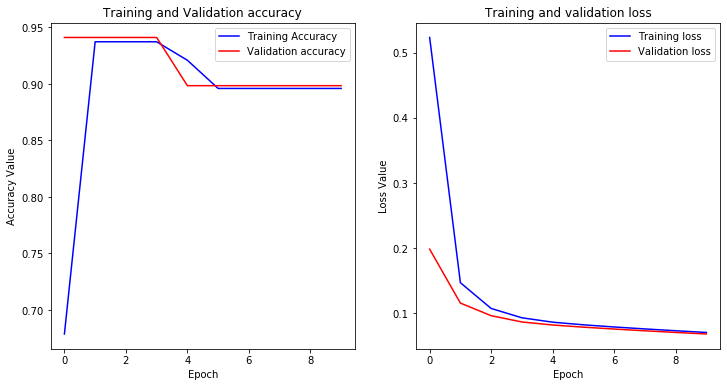

In [23]:
import matplotlib.pyplot as plt

acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(acc, 'b', label='Training Accuracy')
plt.plot(val_acc, 'r', label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.title('Training and Validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, 'b', label='Training loss')
plt.plot(val_loss, 'r' ,label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.title('Training and validation loss')
plt.legend()

plt.show()

